In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 50, 501)

In [3]:
y = np.sin(x)

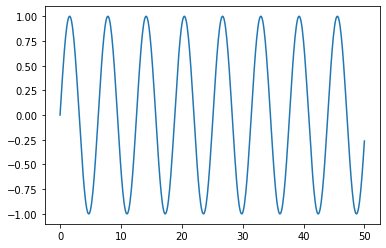

In [4]:
plt.plot(x, y)

In [5]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [6]:
len(df)

501

In [7]:
test_percent = 0.1

In [8]:
len(df) * test_percent

50.1

In [9]:
test_point = np.round(len(df) * test_percent)

In [10]:
test_point

50.0

In [11]:
test_ind = int(len(df) - test_point)

In [12]:
test_ind

451

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [15]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

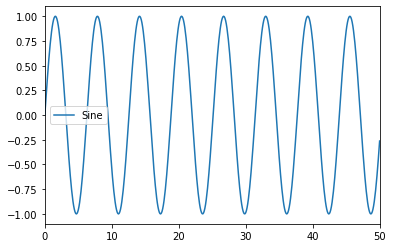

In [18]:
df.plot()

In [19]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, 
                               length=length, batch_size=batch_size)

In [20]:
len(scaled_train)

451

In [21]:
len(generator)

401

In [22]:
X, y = generator[0]

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [24]:
n_features = 1

# Simple RNN

In [25]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features), activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit_generator(generator, epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/20
401/401 [==============================] - 5s 12ms/step - loss: 0.0188
Epoch 2/20
401/401 [==============================] - 4s 10ms/step - loss: 7.0069e-06
Epoch 3/20
401/401 [==============================] - 4s 11ms/step - loss: 8.6837e-06
Epoch 4/20
401/401 [==============================] - 4s 9ms/step - loss: 1.9173e-04
Epoch 5/20
401/401 [==============================] - 4s 9ms/step - loss: 7.6660e-06
Epoch 6/20
401/401 [==============================] - 4s 10ms/step - loss: 8.1453e-05
Epoch 7/20
401/401 [==============================] - 4s 10ms/step - loss: 3.8990e-05
Epoch 8/20
401/401 [==============================] - 4s 10ms/step - loss: 6.0650e-05
Epoch 9/20
401/401 [==============================] - 4s 9ms/step - loss: 2.2022e-05
Epoch 10/20
401/401 [==============================] - 4s 9ms/step - loss: 1.7156e-04
Epoch 11/20
401/401 [=====

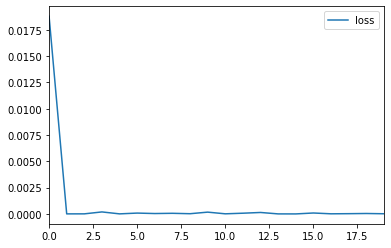

In [28]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [29]:
first_eval_batch = scaled_train[-length:]

In [30]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [31]:
model.predict(first_eval_batch)

array([[0.9457271]], dtype=float32)

In [32]:
scaled_test[0]

array([0.94955134])

In [33]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [34]:
true_predictions = scaler.inverse_transform(test_predictions)

In [35]:
test['Predictions'] = true_predictions

/Users/nathzi1505/Desktop/Private/Online-Courses/TF_2.0/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


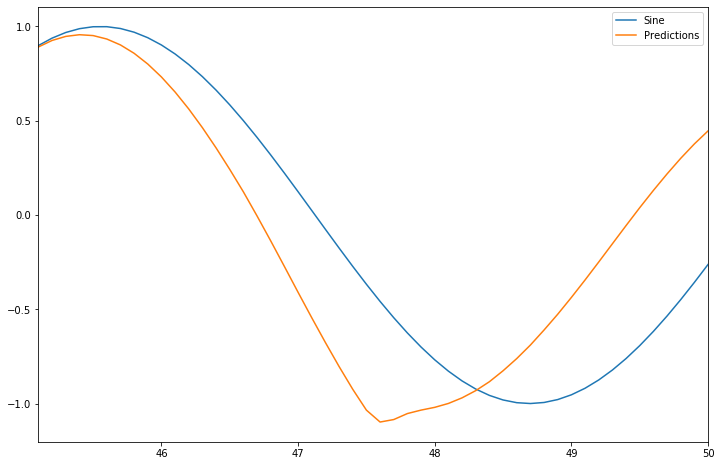

In [36]:
test.plot(figsize=(12, 8))

# LSTM

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [38]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length, batch_size=1)

In [39]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features), activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [40]:
model.fit_generator(generator, 
                    epochs=20, 
                    validation_data=validation_generator,
                    callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 7s 18ms/step - loss: 0.0312 - val_loss: 5.2374e-05
Epoch 2/20
402/402 [==============================] - 6s 15ms/step - loss: 1.6390e-04 - val_loss: 5.7216e-05
Epoch 3/20
402/402 [==============================] - 6s 15ms/step - loss: 4.9678e-04 - val_loss: 1.0894e-05
Epoch 4/20
402/402 [==============================] - 7s 16ms/step - loss: 2.8551e-05 - val_loss: 4.0622e-06
Epoch 5/20
402/402 [==============================] - 6s 15ms/step - loss: 1.5877e-04 - val_loss: 1.3820e-05
Epoch 6/20
402/402 [==============================] - 6s 15ms/step - loss: 7.4631e-05 - val_loss: 4.3550e-05


In [41]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [42]:
true_predictions = scaler.inverse_transform(test_predictions)

/Users/nathzi1505/Desktop/Private/Online-Courses/TF_2.0/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


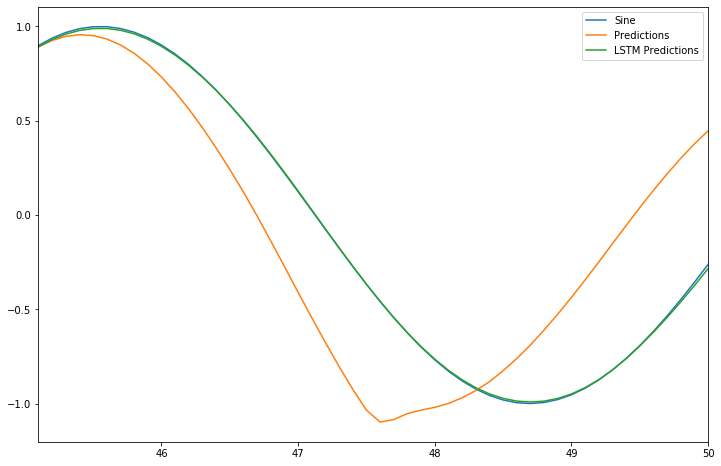

In [43]:
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12, 8))

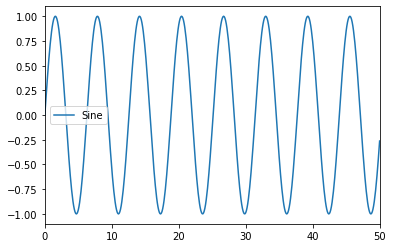

In [44]:
df.plot()

# Forecast Predictions

In [45]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [46]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, 
                               length=length, batch_size=batch_size)

In [47]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features), activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [48]:
model.fit_generator(generator, 
                    epochs=20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 452 steps, validate for 1 steps
Epoch 1/20
452/452 [==============================] - 7s 16ms/step - loss: 0.0411 - val_loss: 5.3064e-05
Epoch 2/20
452/452 [==============================] - 7s 15ms/step - loss: 1.0238e-04 - val_loss: 1.0846e-04
Epoch 3/20
452/452 [==============================] - 7s 14ms/step - loss: 1.0878e-04 - val_loss: 4.5532e-05
Epoch 4/20
452/452 [==============================] - 7s 16ms/step - loss: 4.8982e-04 - val_loss: 1.8413e-04
Epoch 5/20
452/452 [==============================] - 7s 15ms/step - loss: 1.1797e-04 - val_loss: 5.6544e-05


In [49]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [50]:
forecast = scaler.inverse_transform(forecast)

In [52]:
forecast_index = np.arange(50.1, 52.6, step=0.1)

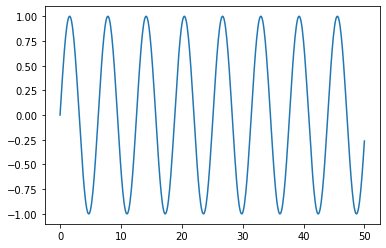

In [53]:
plt.plot(df.index, df['Sine'])

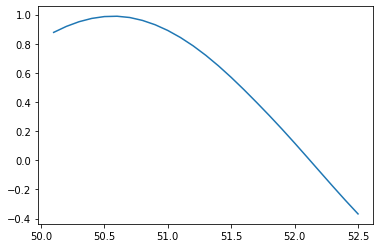

In [54]:
plt.plot(forecast_index, forecast)

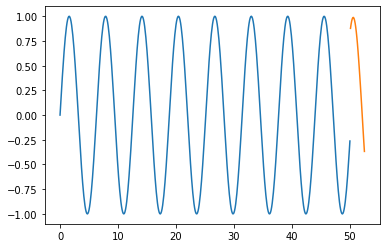

In [55]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)